# Исследование данных о компьютерных играх

 В нашем распоряжении исторические данные за 2016 год из открытых источников о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Наша цель выявить закономерности определяющие успешность игры. Это поможет делать ставку на потенциально успешные с коммерческой точки зрения продукты и активнее их продвигать.
 
 Во время работы над проектом мы познакомимся с данным и подготовим их для анализа. Далее проведём исследовательский анализ данных, в котором углублённо изучим информацию и сделаем первые выводы. Мы составим портрет пользователей каждого представленного в данных региона и проанализируем их предпочтения. В конце проекта мы проверим несколько гипотез, касающихся среднего пользовательского рейтинга и подведём общий итог.
 
 Оглавление проекта доступно в меню Navigate и боковой панели

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Загрузка данных и изучение общей информации

In [9]:
df = pd.read_csv('/datasets/games.csv')

In [10]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Видим, что необходимо будет привести названия столбцов к более аккуратному виду. Год релиза приведём к формату `int`. Данные о суммарных продажах, где они довольно низкие, неудобно измерять в миллионах копий. Домножим в будущем столбцы на `1000`, чтобы считать в тысячах копий. В некоторых столбцах есть пропуски значений. Также можно предположить, что данные отсортированы в порядке убывания по продажам в Северной Америке.

In [11]:
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим, что без пропусков только столбец `Platform` и столбцы с суммарными продажами, далее посчитаем суммарное количество пропусков в каждом столбце. Необходимо будет изменить тип данных в столбце `Year_of_release`, если удастся заполнить пропуски, и `User_Score`. В первом случае на `int`, потому что это год выхода игры, во втором на `float`, потому что это оценка от 0 до 10 баллов и она может быть не целым числом, что мы уже видели в 3 строке данных.

In [6]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Посчитали суммарное количество пропусков

In [16]:
df.isna().mean().sort_values(ascending=False)

Critic_Score       0.513192
Rating             0.404786
User_Score         0.400897
Year_of_Release    0.016093
Name               0.000120
Genre              0.000120
Platform           0.000000
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
dtype: float64

In [17]:
pd.DataFrame(round(df.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
Critic_Score,51.300000
Rating,40.500000
User_Score,40.100000
Year_of_Release,1.600000
Name,0.000000
Genre,0.000000
Platform,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000


Видим, что в датафрейме для более чем половины игр не указан рейтинг критиков, а пользовательского и рейтинга от ESRB нет у порядка 40% данных.

In [8]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Видим, что в датасете представлены данные по играм с 1980 по 2016 год. Разброс по продажам довольно большой, 75% игр в Северной Америке продаются тиражом менее 240 тысяч копий, в других регионах ещё меньше. Максимальное количество проданных копий также в регионе Северной Америки - более 41 миллиона. Средний рейтинг игр по оценке критиков довольно высокий и равен 71.

In [9]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим, то в данных есть значение `tbd`, что означает `to be determined`, значение ещё не определено.

In [10]:
df.loc[df['User_Score'] == 'tbd', 'User_Score'].count()

2424

Посчитали количество таких строк.

In [11]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Платформы на которые выходят игры.

In [12]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Жанры игр.

In [13]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Рейтинги ESRB.

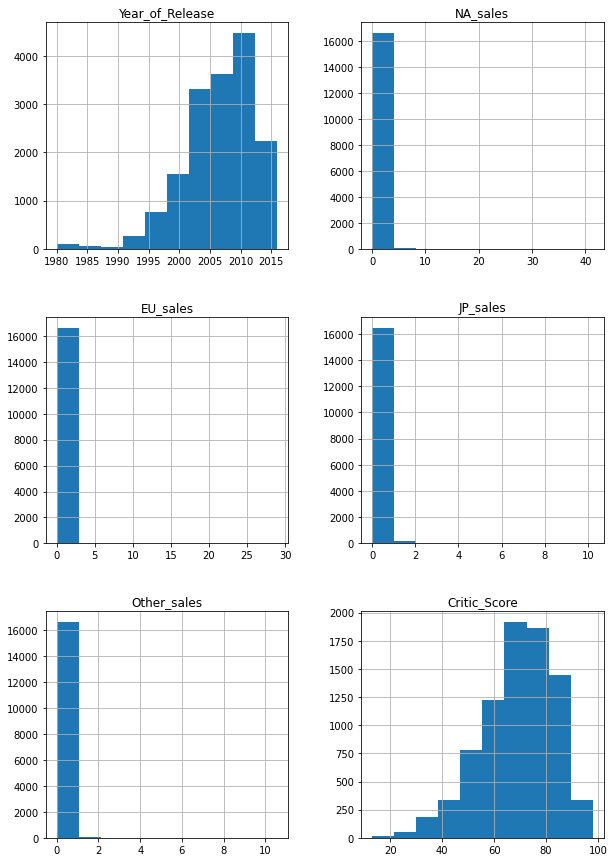

In [14]:
df.hist(figsize=(10, 15));

Большинство игр, представленных в данных выпущены в 21 веке, пик приходится на 2009-2011 года. Как уже ранее отмечалось, подавляющее количество игр во всех регионах продавались тиражом менее 1 миллиона копий.

**Мы получили первое представление о данных. В данных не очень красивое наименование столбцов, в некоторых столбцах неверный тип. В датасете имеются пропуски, которые по возможности необходимо будет обработать.**

## Подготовка данных

### Замена названий в столбцах

In [15]:
columns_name = [column for column in df]
columns_name

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

Создаём список с названиями столбцов.

In [16]:
columns_name_lower = [column.lower() for column in df]
columns_name_lower

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

Приводим названия в нижний регистр.

In [17]:
columns = {}
for item in range(len(columns_name)):
    columns[columns_name[item]] = columns_name_lower[item]

columns

{'Name': 'name',
 'Platform': 'platform',
 'Year_of_Release': 'year_of_release',
 'Genre': 'genre',
 'NA_sales': 'na_sales',
 'EU_sales': 'eu_sales',
 'JP_sales': 'jp_sales',
 'Other_sales': 'other_sales',
 'Critic_Score': 'critic_score',
 'User_Score': 'user_score',
 'Rating': 'rating'}

Создаём словарь с ключом из старого названия и значением из нового.

In [18]:
df = df.rename(columns=columns)

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Заменяем названия столбцов в датасете.

### Обработка дубликатов

In [19]:
df.duplicated().sum()

0

Явных дубликатов в данных нет.

In [70]:
df[df[['name', 'platform','year_of_release']].duplicated(keep=False)]

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1744,1745,1745,Sonic the Hedgehog,PS3,2006.0,Platform,410.0,60.0,40.0,660.0,43.0,4.1,E10+,1170.0
4126,4127,4127,Sonic the Hedgehog,PS3,2006.0,Platform,0.0,480.0,0.0,0.0,43.0,4.1,E10+,480.0


 
    
Видим, что есть неявные дубликаты. Строки 659 и 14244 мы уберём далее в проекте, по причине того, что в них есть пропуски, которые не восстановить. Из строк 604 и 16230 мы оставим строку 604. Если это были данные из разных источников, или технические ошибки, чтобы не потерять данные о продажах, то прибавим к `eu_sales` 0.01, которые были в строке 16230.


In [21]:
df = df.drop(index=16230)

In [22]:
df.loc[604, 'eu_sales'] = df.loc[604, 'eu_sales'] + 0.01

In [23]:
df = df.reset_index()

### Преобразование типов данных


Ранее, когда мы смотрели уникальные значения в столбце с пользовательским рейтингом, то видели аббревиатуру, `tbd`, что означает `to be determined`, значение ещё не определено. Так же мы сразу узнали сколько строк с таким значением - 2424. Довольно много, чтобы заменять их какими-либо числами, потому что это может повлиять на характер распределения рейтингов. В данном случае мы преобразуем тип столбца с пользовательским рейтингом в числовой и сразу заменим эту аббревиатуру на `NaN`.   


In [24]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16714 non-null  int64  
 1   name             16712 non-null  object 
 2   platform         16714 non-null  object 
 3   year_of_release  16445 non-null  float64
 4   genre            16712 non-null  object 
 5   na_sales         16714 non-null  float64
 6   eu_sales         16714 non-null  float64
 7   jp_sales         16714 non-null  float64
 8   other_sales      16714 non-null  float64
 9   critic_score     8136 non-null   float64
 10  user_score       7589 non-null   float64
 11  rating           9948 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Изменили тип данных в столбце `user_score` с `object` на `float64`. Значения `tbd` автоматически заменились на NaN. Мы решили не заменять их каким-либо числом, потому что это может повлиять на характер распредления рейтингов.

In [25]:
df.loc[df['user_score'] == 'tbd'].head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Проверим, что значений `tbd` не осталось.

### Обработка пропущенных значений

In [26]:
df.loc[df['genre'].isna()]

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что два пропущенных значения, которые находятся в столбцах `name` и `genre` находятся в одних и тех же строках. Одна из игр довольно популярная в Северной Америке и Европе, но, к сожалению, у нас нет про неё больше особо данных.

In [27]:
df = df.dropna(subset=['name']).reset_index()

Удалили строки.

In [28]:
year_na = df.loc[df['year_of_release'].isna(), 'name']

Создадим таблицу, где будут игры, в которых не указан год.

In [29]:
for item in year_na:
    df.loc[df['name'] == item, 'year_of_release'] = df.loc[df['name'] == item, 'year_of_release'].max()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   level_0          16712 non-null  int64  
 1   index            16712 non-null  int64  
 2   name             16712 non-null  object 
 3   platform         16712 non-null  object 
 4   year_of_release  16566 non-null  float64
 5   genre            16712 non-null  object 
 6   na_sales         16712 non-null  float64
 7   eu_sales         16712 non-null  float64
 8   jp_sales         16712 non-null  float64
 9   other_sales      16712 non-null  float64
 10  critic_score     8136 non-null   float64
 11  user_score       7589 non-null   float64
 12  rating           9948 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 1.7+ MB


Так как одни и те же игры выпускаются на разных платформах, то для одной платформы дата выхода может быть указана, а для другой нет. Мы заменили пропуски на максимальное значение по конкретной игре.

In [30]:
year_na = df.loc[df['year_of_release'].isna(), 'name']

Перезапишем переменную `year_na`, так как мы заполнили часть пропусков и список игр в которых пропущены значения мог измениться.

In [31]:
years_in_name = []
def name(row):
    if '0' in row:
        years_in_name.append(row)
    elif '9' in row:
        years_in_name.append(row)
    elif '8' in row:
        years_in_name.append(row)

year_na.apply(name)
years_in_name

['wwe Smackdown vs. Raw 2006',
 'Triple Play 99',
 'NFL GameDay 2003',
 'All-Star Baseball 2005',
 'Indy 500',
 'Jet X20',
 'All-Star Baseball 2005',
 'Drake of the 99 Dragons',
 'Tour de France 2011',
 'Sega Rally 2006',
 'Football Manager 2007']

Созадим список с играми, где в названии есть числа, потому что иногда в играх указывается год.

In [32]:
years_in_name.remove('Indy 500')
years_in_name.remove('Jet X20')
years_in_name.remove('Drake of the 99 Dragons')

Удаляем из списка игры, где не указан год.

In [33]:
df.loc[df['name'] == 'Triple Play 99', 'year_of_release'] = 1999

Вручную заменим одно значение, где год не из 21 века.

In [34]:
all_years = []
for item in years_in_name:
    intermediate_list = item.split()
    for item in intermediate_list:
        if '2' in item:
            all_years.append(item)

all_years = list(set(all_years))

all_years

['2003', '2005', '2006', '2007', '2011']

Создаём список с годами, которые встречаюсь в играх, где пропущено значение в столбце `year_of_release`.

In [35]:
for item in years_in_name:
    for year in all_years:
        if year in item:
            df.loc[df['name'] == item, 'year_of_release'] = int(year)

Заполним пропуски годами, которые указаны в играх

In [36]:
df.loc[df['name'] == years_in_name[0]]

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,475,475,wwe Smackdown vs. Raw 2006,PS2,2006.0,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN


Проверим, что год заполнен.

Мы обработали часть пропущенных значений в годе выхода игры. Остальные пропуски оставим незаполненными, так, как они сильно не исказят общую картину.

In [37]:
df.loc[df['rating'].isna(), 'rating'] = 'unknown'

Столбец `rating` - категориальная переменная, неизвестные значения заполнили словом `unknown`.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   level_0          16712 non-null  int64  
 1   index            16712 non-null  int64  
 2   name             16712 non-null  object 
 3   platform         16712 non-null  object 
 4   year_of_release  16574 non-null  float64
 5   genre            16712 non-null  object 
 6   na_sales         16712 non-null  float64
 7   eu_sales         16712 non-null  float64
 8   jp_sales         16712 non-null  float64
 9   other_sales      16712 non-null  float64
 10  critic_score     8136 non-null   float64
 11  user_score       7589 non-null   float64
 12  rating           16712 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 1.7+ MB


В столбцах `critic_scrore` и `user_score` заполнять пропуски мы не будем так как это может сильно исказить общее распределение рейтингов.

### Подсчёт суммарных продаж во всех регионах

In [39]:
df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] * 1000

Домножили столбцы все столбцы с продажами на 1000, чтобы было удобнее оценивать значения с маленьким количеством продаж. Теперь значения измеряются не в миллионах копий, а в тысячах копий.

In [40]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Получили столбец с суммарными продажами.

In [41]:
df.head()

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,0,Wii Sports,Wii,2006.0,Sports,41360.0,28960.0,3770.0,8450.0,76.0,8.0,E,82540.0
1,1,1,Super Mario Bros.,NES,1985.0,Platform,29080.0,3580.0,6810.0,770.0,NaN,NaN,unknown,40240.0
2,2,2,Mario Kart Wii,Wii,2008.0,Racing,15680.0,12760.0,3790.0,3290.0,82.0,8.3,E,35520.0
3,3,3,Wii Sports Resort,Wii,2009.0,Sports,15610.0,10930.0,3280.0,2950.0,80.0,8.0,E,32770.0
4,4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11270.0,8890.0,10220.0,1000.0,NaN,NaN,unknown,31380.0


**На данном этапе проекта мы подготовили данные к исследованию. Мы привели к нормальному виду названия столбцов, проверили наличие явных дубликатов, преобразовали тип данных в столбце `user_score`, по возможности заполнили пропуски в данных, также подсчитали для каждой игры суммарные продажи.**

## Исследовательский анализ данных

### График выпуска игр по годам

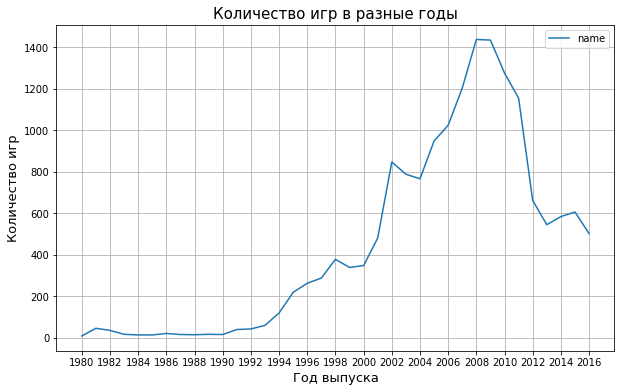

In [42]:
df.groupby('year_of_release').agg({'name': 'count'}).plot(figsize=(10, 6)).set_xticks(range(1980, 2017, 2));
plt.title('Количество игр в разные годы', fontsize = 15);
plt.xlabel('Год выпуска', fontsize = 13);
plt.ylabel('Количество игр', fontsize = 13);
plt.grid(which='major');

 Видим, что ко второй половине 90-х годов начинается резкое увеличение количества выпускаемых игр. К 2006 году количество выпущенных игр в год достигает 1000, а пик приходится на 2008-2009, где выпускалось более 1400 игр. Далее количество выпускаемых игр снижалось и к 2016 году находится в районе 500.
 
 Для прогнозирования на 2017 год данные за все года будут не нужны, так как часть платформ, на которые выходили игры, уже неактуальны.

### Изменение продаж по платформам

In [43]:
top_platforms = ( 
    df.groupby('platform')['total_sales']
    .sum()
    .sort_values()
    .tail(10)
    .index
)
top_platforms

Index(['PC', 'PSP', 'PS4', 'GBA', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'], dtype='object', name='platform')

Получим индексы 10 платформ с самыми высокими продажами за всё время.

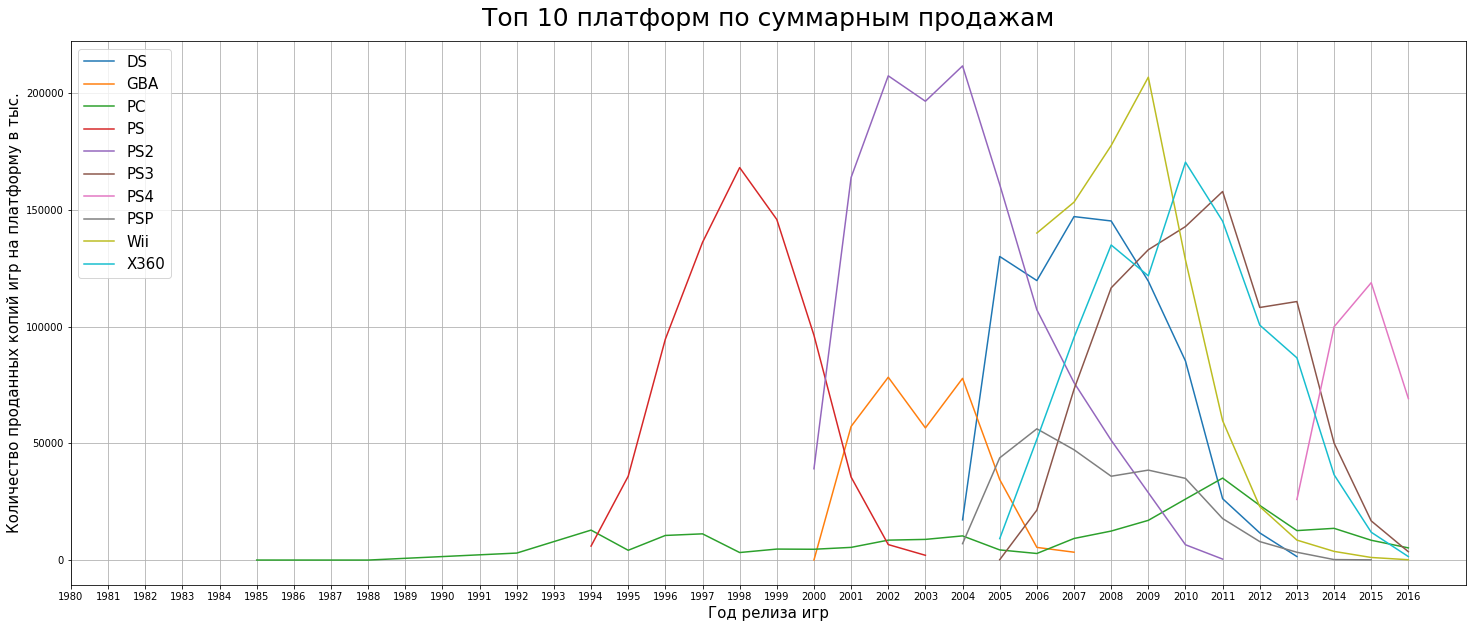

In [44]:
ax = ( df.query('platform in @top_platforms')
      .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
      .plot(figsize=(25, 10), grid=True)
      .set_xticks(df['year_of_release'].dropna().unique())
     )
plt.title('Топ 10 платформ по суммарным продажам', fontsize=25, pad=15);
plt.xlabel('Год релиза игр', fontsize=15);
plt.ylabel('Количество проданных копий игр на платформу в тыс.', fontsize=15);
plt.legend(loc='upper left', fontsize=15);


На графике видим, что примерный "срок жизни платформы" около 10 лет, если не брать в расчёт `PC`. Наибольшие продажи по платформам имеют меньший промежуток времени, около 5-6 лет.


Актуальным периодом будем считать 4 года. Это не слишком маленький, и не слишком большой период, который подойдёт для прогнозирования на будущий год. Так мы захватим все тренды, которые присутствуют в индустрии, а тех, которые уже "отживают" практически не будет. Поэтому для анализа возьмём период с 2013 по 2016 года.


In [45]:
df_top_actual = df.loc[df['year_of_release'] >= 2013].reset_index(drop=True)
top_actual_index = ( 
    df_top_actual.groupby('platform')['total_sales']
    .sum()
    .sort_values()
    .tail()
    .index
)
top_actual_index

Index(['X360', '3DS', 'XOne', 'PS3', 'PS4'], dtype='object', name='platform')

Мы нашли 5 самых популярных платформ в период с 2013 по 2016 год.

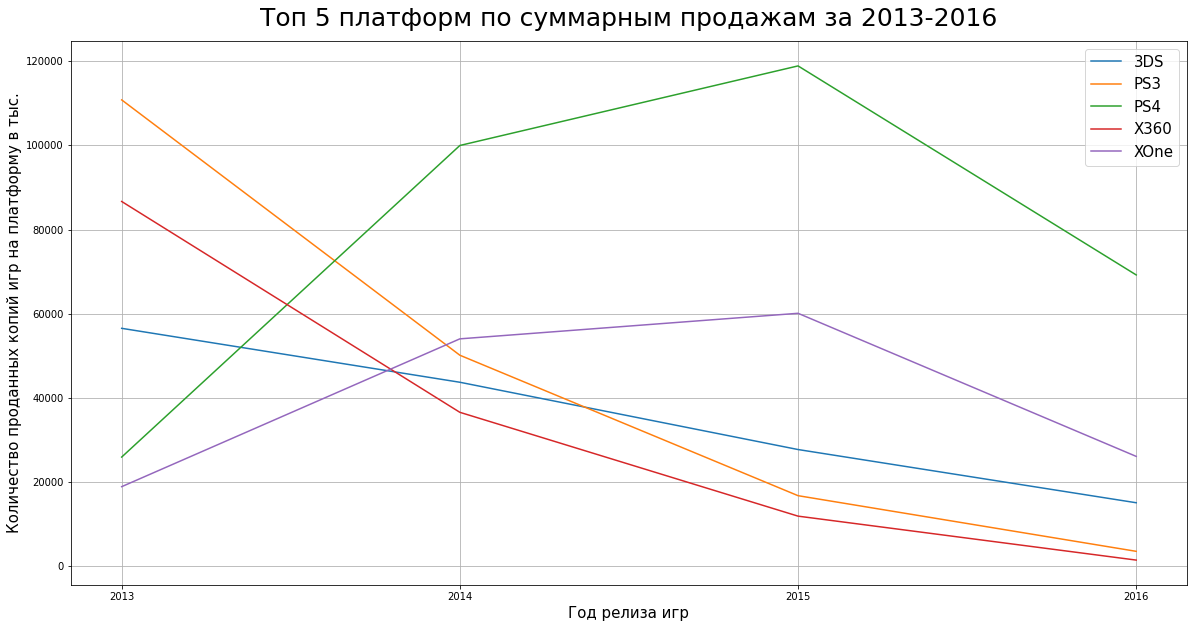

In [46]:
ax = ( 
    df_top_actual.query('platform in @top_actual_index')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(figsize=(20, 10), grid=True)
    .set_xticks(range(2013, 2017))
)

plt.title('Топ 5 платформ по суммарным продажам за 2013-2016', fontsize=25, pad=15);
plt.xlabel('Год релиза игр', fontsize=15);
plt.ylabel('Количество проданных копий игр на платформу в тыс.', fontsize=15);
plt.legend(fontsize=15);

Относительно графика с топ 10 платформ по суммарным продажам, в графике с топ 5 за период с 2013 по 2016 год в списках появились 2 новые платформы - это `XOne` и `3DS`. Видим, что у `3DS` уже с 2013 года тренд на снижение продаж, но ещё какое-то время она может быть потенциально прибыльной, потому что продажи хоть и падают, но за 2016 год суммарно продано в районе 17-18 миллионов копий. У `PS4` и `XOne`, которые вышли в один год, в 2013, всё время был тренд на повышение количества продаж. Учитывая изначальную информацию, что данные за 2016 год могут быть неполными, консоли ещё не просуществовали достаточно долго, и по имеющейся информации по предыдущему графику, можно сделать вывод, что платформы ещё не вышли на свой пик продаж и они являются потенциально самыми прибыльными. Платформы `PS3` и `X360` уже, к сожалению, 'умирают', их продажи всё ещё считаются миллионами копий, но делать ставку на них в будущем нет смысла, когда есть платформы следующего поколения.

### Построение "ящика с усами" для актуальных платформ

In [47]:
total_sales_top = df_top_actual.query('platform in @top_actual_index')

Возьмём 5 топовых платформ по продажам за период с 2013 по 2016 год

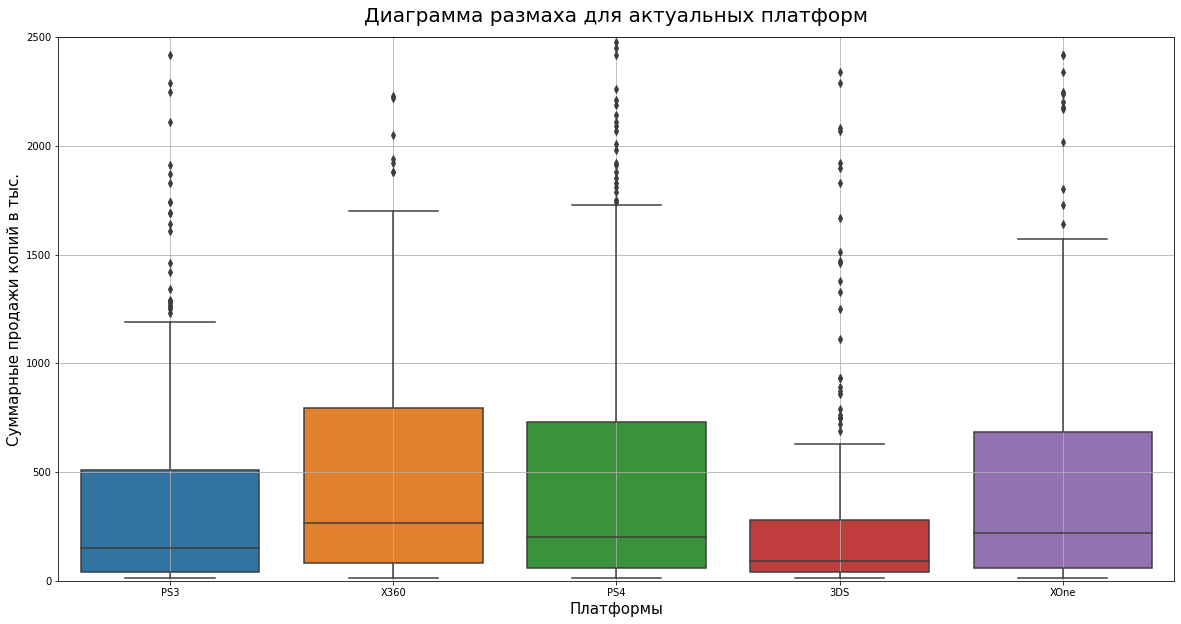

In [48]:
plt.figure(figsize=(20, 10));
plt.ylim(-1, 2500);
plt.title('Диаграмма размаха для актуальных платформ', fontsize=20, pad=15);
sns.boxplot(x="platform", y="total_sales", data=total_sales_top);
plt.xlabel('Платформы', fontsize=15);
plt.ylabel('Суммарные продажи копий в тыс.', fontsize=15);
plt.grid(which='major');

Для наглядности ограничим ось `y` до 2,5 миллионнов проданных копий. Видим, что продажи для 75% игр каждой топовой платформы не превышают примерно 800 тысяч копий. Но у каждой платформы есть достаточно много топовых игр, которые 'выстреливают' и продаются большим тиражом, что видно по тому, сколько точек находятся за верхними усами.

### Оценка на влияние продаж отзывов критиков и пользователей

Оценку проведём на основе платформы `X360`, так как у неё были самые высокие средние продажи по данным диаграммы размаха.

In [49]:
one_platform = df_top_actual.query('platform == "X360"')
one_platform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 1 to 2217
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   level_0          186 non-null    int64  
 1   index            186 non-null    int64  
 2   name             186 non-null    object 
 3   platform         186 non-null    object 
 4   year_of_release  186 non-null    float64
 5   genre            186 non-null    object 
 6   na_sales         186 non-null    float64
 7   eu_sales         186 non-null    float64
 8   jp_sales         186 non-null    float64
 9   other_sales      186 non-null    float64
 10  critic_score     81 non-null     float64
 11  user_score       143 non-null    float64
 12  rating           186 non-null    object 
 13  total_sales      186 non-null    float64
dtypes: float64(8), int64(2), object(4)
memory usage: 21.8+ KB


В нашем распоряжении 186 игр, для большинства игр у нас есть пользовательская оценка, оценки критиков нет у поряд 60% игр.

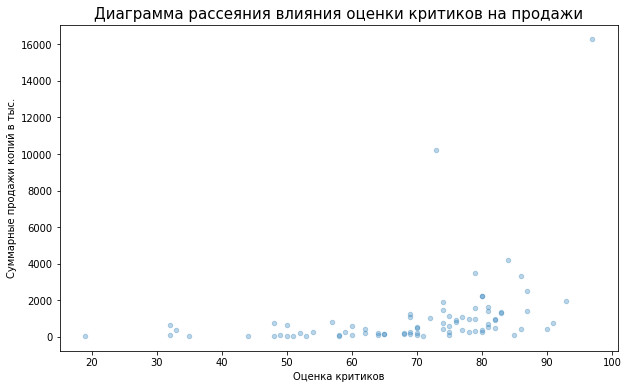

In [50]:
one_platform.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(10, 6));
plt.title('Диаграмма рассеяния влияния оценки критиков на продажи', fontsize=15);
plt.xlabel('Оценка критиков', fontsize=10);
plt.ylabel('Суммарные продажи копий в тыс.', fontsize=10);

По графику видим, что начиная примерно с оценки 70 есть явная связь с повышением количества проданных копий игры.

In [51]:
one_platform['total_sales'].corr(one_platform['critic_score'])

0.3503445460228665

Коэффициент корреляции получился 0.35, что свидетельствует об умеренной положительной связи между оценкой критиков и количеством проданных копий игры.

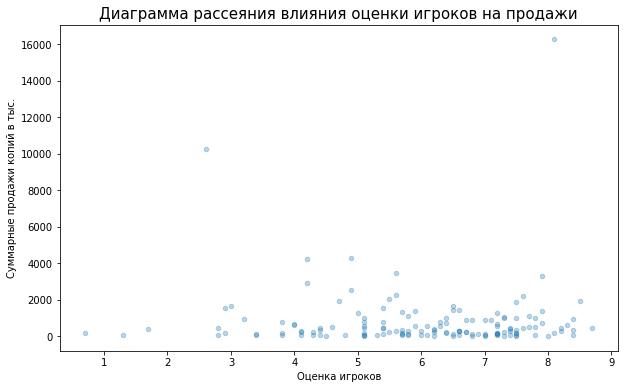

In [52]:
one_platform.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(10, 6));
plt.title('Диаграмма рассеяния влияния оценки игроков на продажи', fontsize=15);
plt.xlabel('Оценка игроков', fontsize=10);
plt.ylabel('Суммарные продажи копий в тыс.', fontsize=10);

По данному графику можно предположить, что связи между оценкой игроков и количеством проданных копий будет слабая, так как есть довольно выбивающиеся значения, где игры с низкой оценкой продаются большим тиражом, а игры с высокой очень маленьким.

In [53]:
one_platform['total_sales'].corr(one_platform['user_score'])

-0.011742185147181344

Как мы и предполагали сила корреляции между оценкой игроков и продажами слабая. Несколько парадоксально, что на данном наборе данных она получилась даже отрицательная.


    
Построим такие же диаграммы для остальных четырёх популярных платформ в датасете с актуальными данными. Для этого напишем функцию. Графики будут выводиться рядом друг с другом, а также сразу будет указана корреляция.
    
Ранее выяснили, что наиболее актуальными платформами являются: X360, 3DS, XOne, PS3, PS4.


In [54]:
def sales(platform):
    plt.subplots(figsize=(25, 5))
    score = ['critic_score', 'user_score']
    for i, score in enumerate(score):
        current = df_top_actual.loc[df_top_actual['platform'] == f'{platform}'] # получаем срез с нужной нам платформой
        current.plot(x=score, y='total_sales', kind='scatter', alpha=0.3, ax = plt.subplot(1, len(platform), i + 1)) # строим графики
        if score == 'critic_score': # переменная для подставления в название графика
            name = 'критиков'
        else:
            name = 'игроков'
        plt.title(f'Влияние оценки {name} на продажи')
        plt.xlabel(f'Оценка {name}', fontsize=10);
        plt.ylabel('Суммарные продажи копий в тыс.', fontsize=10);
    print('Корреляция продаж с оценками критиков:', current['total_sales'].corr(current['critic_score'])) # выводим корреляцию
    print('Корреляция продаж с оценками игроков:', current['total_sales'].corr(current['user_score']))


    
График для XOne


Корреляция продаж с оценками критиков: 0.41699832800840153
Корреляция продаж с оценками игроков: -0.06892505328279422


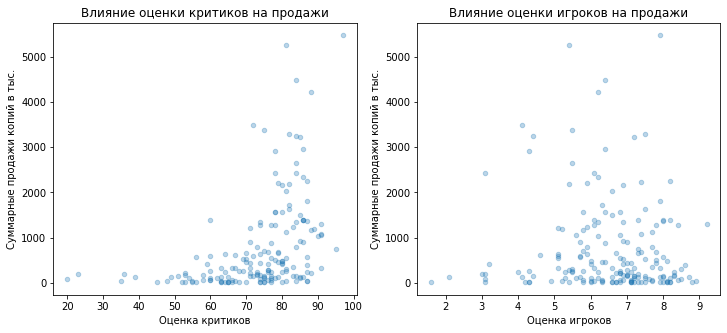

In [55]:
sales('XOne')



Корреляция между оценками и продажами умеренная. Между оценкой игроков и продажами корреляция слабая и также как у X360 отрицательная, по графику видно, что оценка игры почти не связана с продажами.



    
График для PS4


Корреляция продаж с оценками критиков: 0.40656790206178106
Корреляция продаж с оценками игроков: -0.03195711020455645


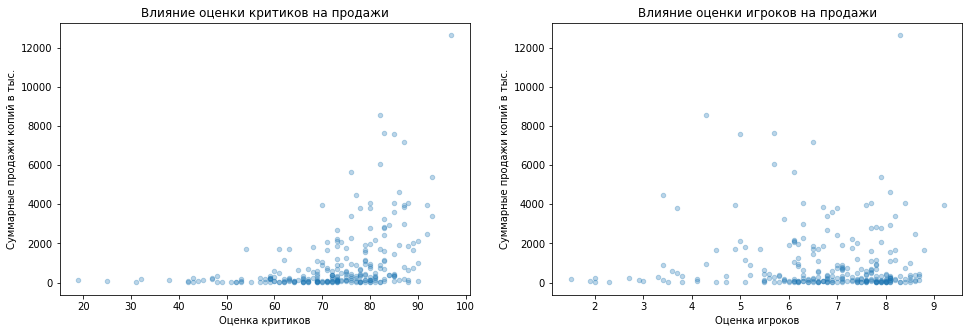

In [56]:
sales("PS4")


Корреляция между оценками и продажами умеренная, что показано на графике. Между оценкой игроков и продажами корреляция слабая и также как у X360 даже отрицательная, по графику видно, что игры как и с низкой оценкой продаются хорошо, так и с высокой плохо.



    
График для PS3


Корреляция продаж с оценками критиков: 0.3342853393371918
Корреляция продаж с оценками игроков: 0.0023944027357566764


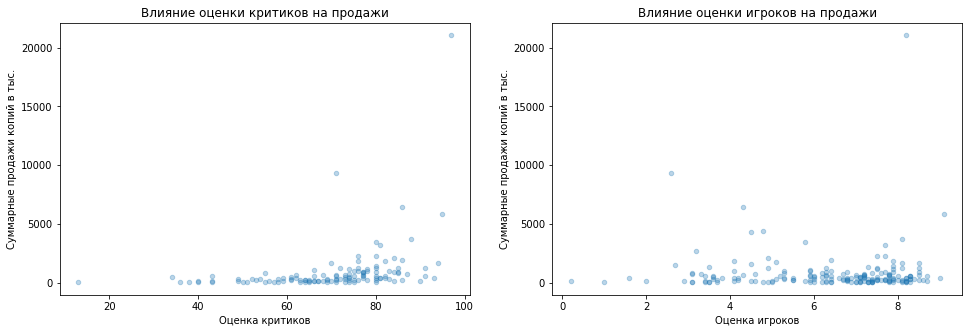

In [57]:
sales('PS3')


Корреляция между оценками и продажами умеренная, что показано на графике. Между оценкой игроков и продажами корреляция слабая и также как у X360 и PS4, но положительная.




    
График для 3DS


Корреляция продаж с оценками критиков: 0.3570566142288104
Корреляция продаж с оценками игроков: 0.24150411773563005


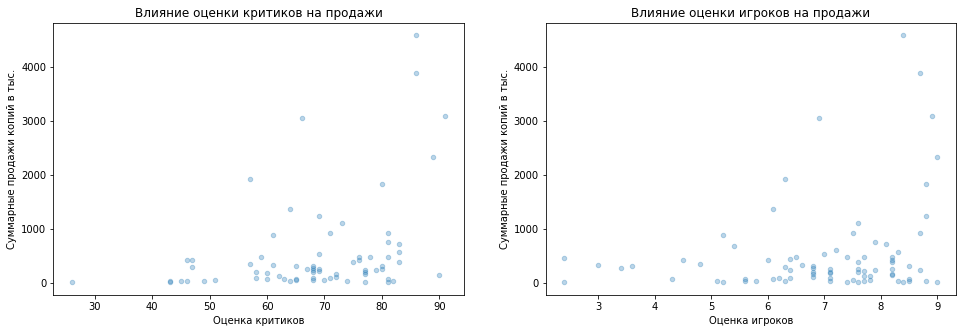

In [58]:
sales('3DS')


    
У японской платформы от компании Nintendo корреляция с оценками игроков слабая, но приближается к умеренной, в отличие от предыдущих просмотренных графиков. Зависимость между продажами и оценкой критиков умеренная и находится на уровне значений других платформ. По графику влияния оценки игроков на продажи также видим визуальные различия от предыдущих, здесь можно проследить некоторую зависимость оценки и продаж.



    
На основе представленных графиков и корреляции можно сделать вывод, что для платформ производства компаний Microsoft и Sony одним из важных факторов продаж является оценка критиков, максимальной корреляции с продажами, около 42, обладают игры на платформу `XOne`. Мнение игроков на продажи на этих плафтормах почти не влияет.
    
В Японии несколько иная ситуация, помимо зависимости от оценки критиков, которая сопоставима с таковыми у других исследованных плаформ, на продажи для платформы Nintendo также влияет оценка игроков, связь хоть и слабая, но приближается к умеренной.


### Оценка распределения игр по жанрам

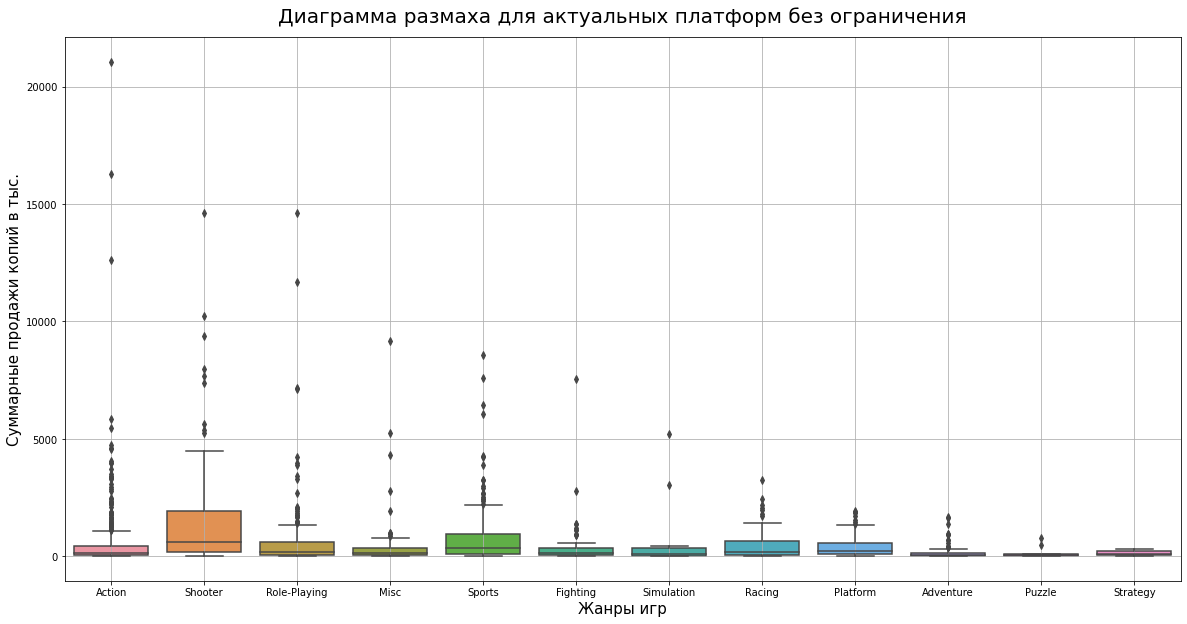

In [59]:
plt.figure(figsize=(20, 10));
plt.title('Диаграмма размаха для актуальных платформ без ограничения', fontsize=20, pad=15);
sns.boxplot(x="genre", y="total_sales", data=total_sales_top);
plt.xlabel('Жанры игр', fontsize=15);
plt.ylabel('Суммарные продажи копий в тыс.', fontsize=15);
plt.grid(which='major');

Данная диаграмма без ограничения по оси y, для получения общего видения картины. Ниже, мы сделаем ограничение, чтобы нагляднее рассмотреть средние значения. По графику видим, что есть некоторое количество жанров игр, у которых много "выстреливающих" проектов, которые выходят за средние значения. Несмотря на то, что у шутеров медианное значение выше, чем у всех остальных, но экшен игры единственные у которых есть суммарные продажи за 15 миллионов копий, и достаточно много игр, которые просто выбиваются из нормальных значений диаграммы размаха.

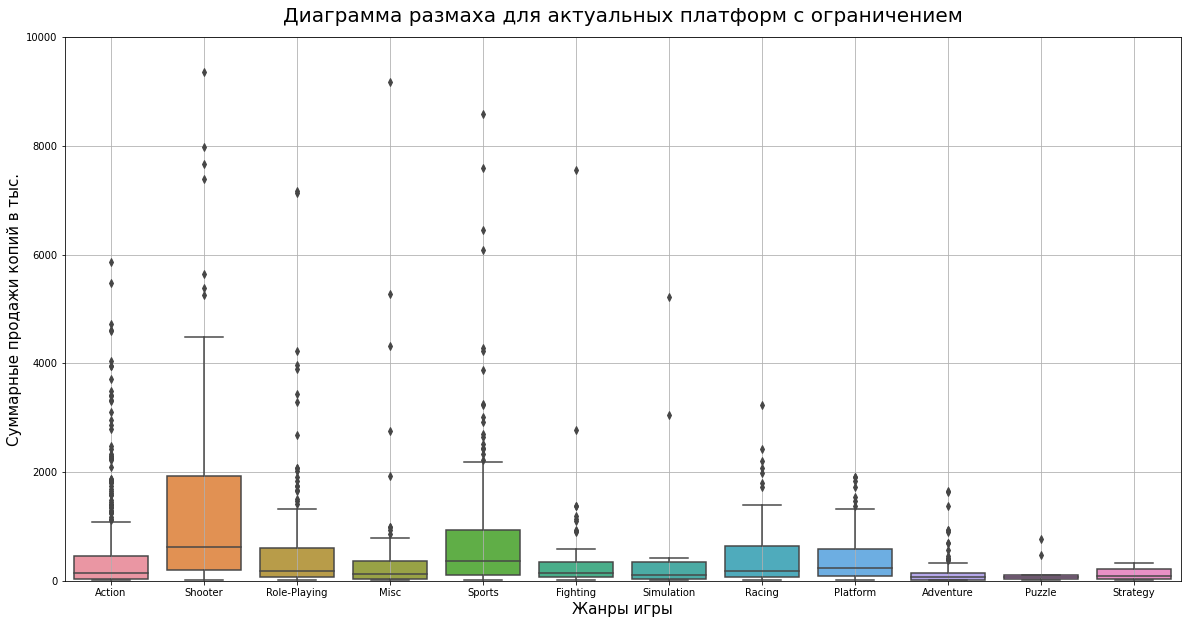

In [60]:
plt.figure(figsize=(20, 10));
plt.ylim(-1, 10000);
plt.title('Диаграмма размаха для актуальных платформ с ограничением', fontsize=20, pad=15);
sns.boxplot(x="genre", y="total_sales", data=total_sales_top);
plt.xlabel('Жанры игры', fontsize=15);
plt.ylabel('Суммарные продажи копий в тыс.', fontsize=15);
plt.grid(which='major');

По данному графику с ограничением мы видим, что в явных лидерах по медианной прибыли являются шутеры, а уровень 3 квантиля достигает почти 2 млн копий, что преводсходит с большим отрым остальные жанры. Игр с низкими продажами сразу несколько, но по медианной прибыли выляются паззлы, у них показатели самые низкие. Также стабильными продажами обладают спортивные симуляторы, гоночные, платформеры и RPG. Экшены хоть и не выделяются особой стабильность по медианным продажам, но имеют много проектов, которые сильно превышают обычные показатели.

**В ходе исследования мы выяснили, что потенциально прибыльными платформами являются `PS4` и `XOne`, также как потенциально прибыльную можно рассматривать `3DS`, пока у данной платформы показатели продаж ещё довольно высокий, но с каждым годом они снижаются. Выявили закономерности между оценкой критиков и уровнем продаж игр. Выяснили, что самыми прибыльным для компаний являются шутеры, они стабильно приносят хороший доход, а также экшен игры, много из которых сильно выбиваются из средних значений продаж.**

## Составление портрета пользователя каждого региона

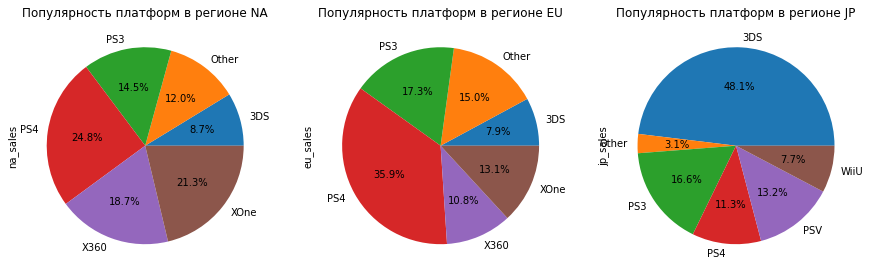

In [61]:
plt.subplots(figsize=(15, 5))
regions = ['na', 'eu', 'jp'] # наименование регионов
for i, region in enumerate(regions):
    column_name = f'{region}_sales' # создаём шаблон с именем столбца региона
    current = df_top_actual.groupby('platform').agg({column_name: 'sum'}).reset_index() # группируем по платформам
    current['rank'] = current[column_name].rank(method = 'dense', ascending=False) # присваиваем ранг значеням в столбце
    current.loc[current['rank'] > 5, 'platform'] = 'Other' # оставляем топ 5 платформ, остальные переименовываем в 'другие'
    current = current.groupby('platform').agg({column_name: 'sum'}) # повторно группируем
    current.plot(y=column_name, kind='pie', autopct = '%1.1f%%', ax = plt.subplot(1, len(regions), i + 1), legend=False) # рисуем графики
    plt.title(f'Популярность платформ в регионе {region.upper()}')

 Мы взяли данные за последние 4 года с 2013 по 2016 год. На диаграммах представлены топ 5 по популярности консолей в разных регионах. Все невошедшие в топ 5 консоли мы обозначили как `Other`.
 
 В Северной Америке преобладают консоли `PS4`, далее идёт `XOne`. 12% составляют разнообраные менее популярные консоли, которые мы объединили в одну группу. Однако по консолям прошлого поколения у `X360` преимущество над `PS3`. Суммарно доля рынка консолей от Microsoft 40%, у Sony с `PS4` и `PS3` с суммарно 39.3%. Показатели довольно близкие.
 
 В Европе видим другую картину, более 53% платформ приходятся на продукцию Sony, а именно на `PS4` 35.9% и `PS3` 17.3%. Продукция от компании Microsoft занимает всего 23.9%. Вероятно рынок приставок от компании Sony более ориентирован на Европу, где они почти полность выиграли у всех конкурентов, занимая более половины рынка.

  В Японии в доминирующем положении находится портативная приставка от Nintendo. `3DS` держит 48.1% рынка. Рядом расположилась Sony c 31.1% по трём платформам: `PS3`, `PS4` и `PSV`.

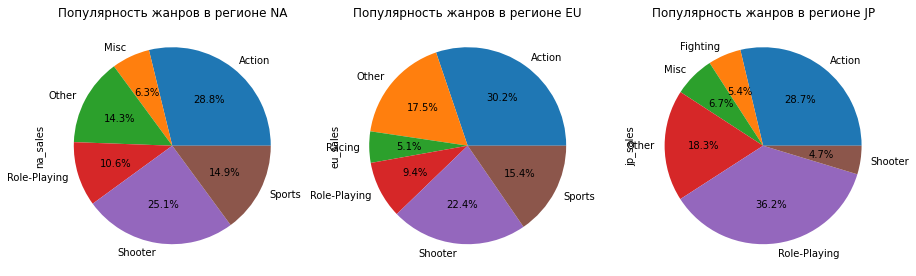

In [62]:
plt.subplots(figsize=(15, 5))
regions = ['na', 'eu', 'jp'] # наименование регионов
for i, region in enumerate(regions):
    column_name = f'{region}_sales' # создаём шаблон с именем столбца региона
    current = df_top_actual.groupby('genre').agg({column_name: 'sum'}).reset_index() # группируем по жанрам
    current['rank'] = current[column_name].rank(method = 'dense', ascending=False) # присваиваем ранг значеням в столбце
    current.loc[current['rank'] > 5, 'genre'] = 'Other' # оставляем топ 5 жанров, остальные переименовываем в 'другие'
    current = current.groupby('genre').agg({column_name: 'sum'}) # повторно группируем
    current.plot(y=column_name, kind='pie', autopct = '%1.1f%%', ax = plt.subplot(1, len(regions), i + 1), legend=False) # рисуем графики
    plt.title(f'Популярность жанров в регионе {region.upper()}')
   

 Мы взяли данные за последние 4 года с 2013 по 2016 год. На диаграммах представлены топ 5 по популярности жанров в разных регионах. Все невошедшие в топ 5 жанры мы обозначили как `Other`.
 
 В Северной Америке и Европе видим похожие тенденции, самыми популярными жанрами являются `Action` и `Shooter`. Скорее всего это связано с тем, что популярные игровые студии, базирующиеся в этих регионах, специализируются на данных играх и делают их стабильно качественно, чем поддерживают популярность.
 
 В Японии мы видим несколько отличающуюся картину, там также занимает значительную долю жанр `Action`, но первым по популярности является `Role-Playing`. Вероятно связано с тем, что на портативную приставку `3DS` выходило множество игр данного жанра.

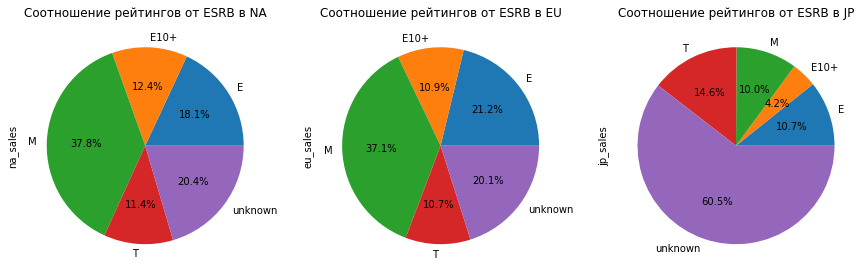

In [63]:
plt.subplots(figsize=(15, 5))
regions = ['na', 'eu', 'jp'] # наименование регионов
for i, region in enumerate(regions):
    column_name = f'{region}_sales' # создаём шаблон с именем столбца региона
    current = df_top_actual.groupby('rating').agg({column_name: 'sum'}).reset_index() # группируем по рейтингу
    current['rank'] = current[column_name].rank(method = 'dense', ascending=False) # присваиваем ранг значеням в столбце
    current.loc[current['rank'] > 5, 'rating'] = 'Other' # оставляем топ 5 рейтингов, остальные переименовываем в 'другие'
    current = current.groupby('rating').agg({column_name: 'sum'}) # повторно группируем
    current.plot(y=column_name, kind='pie', autopct = '%1.1f%%', ax = plt.subplot(1, len(regions), i + 1), legend=False) # рисуем графики
    plt.title(f'Соотношение рейтингов от ESRB в {region.upper()}')

 По данным диаграммам видим, что в Северной Америке и Европе довольно похожее распределение по рейтингам. На предыдущей диаграмме мы видели, что там популярны игры похожих жанров, а именно шутеры и экшен игры, вероятно данным категориям игр и присваивают соответствующие рейтинги - `M` и `E`. Также в этих регионах довольно много игр, которые не получили оценки от ESRB.
 
 В Японии картина немного другая, вероятно, есть достаточно много игр, выходящих на местные платформы и не сертифицирующиеся компанией ESRB, потому что не находятся в широкой продаже за пределами страны. Из-за этого для больше половины игр рейтинг неизвестен.

## Проверка гипотез

### Гипотеза №1

 - Нулевая гипотеза: средние пользовательские оценки платформ `Xbox One` и `PC` равны.
 - Альтернативная гипотеза: средние пользовательские оценки платформ `Xbox One` и `PC` разные.

В данном случае мы берём актуальные данные с 2013 по 2016 год.

In [64]:
xbox_score = df_top_actual.loc[(df_top_actual['platform'] == 'XOne') & (~df_top_actual['user_score'].isna()), 'user_score']
xbox_score.count()

182

In [65]:
pc_score = df_top_actual.loc[(df_top_actual['platform'] == 'PC') & (~df_top_actual['user_score'].isna()), 'user_score']
pc_score.count()

158

Мы взяли данные для которых определён пользовательский рейтинг, так как выборки неравны, то при проведении теста укажем, что их дисперсии неравны.

In [66]:
print('Среднее значение пользовательской оценки для платформы Xbox One:', xbox_score.mean())
print('Среднее значение пользовательской оценки для платформы PC:', pc_score.mean())

alpha = 0.05

result = st.ttest_ind(
    xbox_score, 
    pc_score, 
    equal_var=False)

print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Среднее значение пользовательской оценки для платформы Xbox One: 6.521428571428572
Среднее значение пользовательской оценки для платформы PC: 6.280379746835442
p-значение: 0.16174359801784316
Не отвергаем нулевую гипотезу


p-значение около 16%, что выше уровня значимости, оснований отвергать нулевую гипотезу нет.

### Гипотеза №2

 - Нулевая гипотеза: средние пользовательские оценки жанров `Action` и `Sports` равны.
 - Альтернативная гипотеза: средние пользовательские оценки жанров `Action` и `Sports` разные.
 
 Немного изменили формулировку гипотезы, нулевая гипотеза будет, что средние равны, а альтернативная, что не равны.

 В данном случае мы берём актуальные данные с 2013 по 2016 год.

In [67]:
action_score = df_top_actual.loc[(df_top_actual['genre'] == 'Action') & (~df_top_actual['user_score'].isna()), 'user_score']
action_score.count()

392

In [68]:
sports_score = df_top_actual.loc[(df_top_actual['genre'] == 'Sports') & (~df_top_actual['user_score'].isna()), 'user_score']
sports_score.count()

160

Мы взяли данные для которых определён пользовательский рейтинг, так как выборки неравны, то при проведении теста укажем, что их дисперсии неравны.

In [69]:
print('Среднее значение пользовательской оценки для жанра Action:', action_score.mean())
print('Среднее значение пользовательской оценки для платформы Sports:', sports_score.mean())

alpha = 0.05

result = st.ttest_ind(
    action_score, 
    sports_score, 
    equal_var=False)

print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Среднее значение пользовательской оценки для жанра Action: 6.8375
Среднее значение пользовательской оценки для платформы Sports: 5.238124999999999
p-значение: 1.3883444596405356e-20
Отвергаем нулевую гипотезу


p-значение значительно меньше уровня значимость, есть основания отвергнуть нулевую гипотезу о равенстве средних значений, в пользу альтернативной.

 **Мы формулировали обе гипотезы изходя из того, что средние двух совокупностей равны. Такая формулировка удобнее и не требует лишних действий в коде. Для проверки гипотез мы использовали `ttest_ind`, который позволяет проверить гипотезы о равнстве средних двух генеральных совокупностей.**

## Вывод

 В данном исследовании мы изучили информацию о играх с 1980 по 2016 год, которые продавались на различных платформах в Северной Америке, Европе, Японии и в остальном мире. Целью нашего исследования было выявить закономерности определяющие успешность игры, что позволило бы спланировать стратегию на будущий год, для повышения прибыли компании.
 В ходе исследования мы подготовили данные для изучения и провели исследовательский анализ. В качестве данных для углублённого анализа мы взяли информацию с 2013 по 2016 год, так как платформы, на которые игры выпускались ранее этого периода уже неактуальны, а в данном промежутке есть платформы, которые уже прошли свой пик, и те, которые только набирают свою популярность и являются потенциально коммерчески успешными. В результате исследования мы выяснили, что:
 - Потенциально прибыльными платформами являются `PS4` и `XOne`
 - Потенциально прибыльной платформой пока ещё остаётся `3DS` 
 - Существует закономерность между оценкой критиков и уровнем продаж игр
 - Выяснили, что самыми прибыльным для компаний являются шутеры и экшен-игры

Составили типичные портреты пользователей для представленных регионов (Северная Америка, Европа, Япония). В Северной Америке доли консолей  от компании Microsoft и Sony примерно равны. Из игр популярны шутеры и экшен игры, а в выставленных рейтингах превалируют `M` и `Е`. В Европе с популярностью жанров и рейтингов похожая картина как и в Северной Америке, однако огромную долю рынку занимают платформы компании Sony. Япония кардинально отличается от других регионов. Там популярны консоли компании Nintendo, из жанров самый популярный `Role-Playing`, а для большинства игр рейтинг ESRB неизвестен.

 В конце мы проверили несколько гипотез о равенстве двух генеральных совокупностей и приняли, что средние пользовательские оценки платформ `XOne` и `PC` равны, а оценки жанров `Action` и `Sports` нет.
 